# Bedmap2 Grids
**Description:**  Gridded data in EPSG 3031 projection. Topographic layers, uncertainties, and masks.

**Dataset:** 

N.A. 

**Associated paper:** 

Fretwell, P., H. D. Pritchard, D. G. Vaughan, J. L. Bamber, N. E. Barrand, R. E. Bell, C. Bianchi, et al. “Bedmap2: Improved Ice Bed, Surface and Thickness Datasets for Antarctica.” The Cryosphere 7, no. 1 (2013): 375–93. https://doi.org/10.5194/tc-7-375-2013.


In [1]:
import polartoolkit as ptk

In [2]:
layer_names = [
    # topographies
    "surface",
    "icebase",
    "bed",
    # thicknesses
    "ice_thickness",
    "water_thickness",
    # uncertainties
    "grounded_bed_uncertainty",
    "ice_thickness_uncertainty",
    # others
    "coverage",
    "icemask_grounded_and_shelves",
    "rockmask",
    "gl04c_geiod_to_WGS84",
    "lakemask_vostok",
]

grids = []
for name in layer_names:
    data = ptk.fetch.bedmap2(
        layer=name,
        # available options
        spacing=5e3,  # if >=5km, will use preprocessed grid
        # region,
        # registration, # "g" for gridline or "p" for pixel
        # reference, # "eigen-gl04c" or "ellipsoid"
        # fill_nans, # True or False
    )
    grids.append(data)
    print(f"Info for {name}")
    _ = ptk.get_grid_info(data, print_info=True)
    print("##########")

Info for surface


grid spacing: 5000.0 m
grid region: (-3327500.0, 3327500.0, -3327500.0, 3327500.0)
grid zmin: 0.554849088192
grid zmax: 4081.18359375
grid registration: g
##########


Info for icebase


grid spacing: 5000.0 m
grid region: (-3327500.0, 3327500.0, -3327500.0, 3327500.0)
grid zmin: -2576.65771484
grid zmax: 3660.4074707
grid registration: g
##########


Info for bed


grid spacing: 5000.0 m
grid region: (-3327500.0, 3327500.0, -3327500.0, 3327500.0)
grid zmin: -6899.45117188
grid zmax: 3660.40771484
grid registration: g
##########


Info for ice_thickness


grid spacing: 5000.0 m
grid region: (-3327500.0, 3327500.0, -3327500.0, 3327500.0)
grid zmin: -31.2804718018
grid zmax: 4578.81591797
grid registration: g
##########


Info for water_thickness


grid spacing: 5000.0 m
grid region: (-3327500.0, 3327500.0, -3327500.0, 3327500.0)
grid zmin: -867.770935059
grid zmax: 2554.50048828
grid registration: g
##########


Info for grounded_bed_uncertainty


grid spacing: 5000.0 m
grid region: (-3327500.0, 3327500.0, -3327500.0, 3327500.0)
grid zmin: -304.70916748
grid zmax: 65895.0390625
grid registration: g
##########


Info for ice_thickness_uncertainty


grid spacing: 5000.0 m
grid region: (-3399000.0, 3401000.0, -3400000.0, 3400000.0)
grid zmin: 0.0
grid zmax: 65535.0
grid registration: g
##########


Info for coverage


grid spacing: 5000.0 m
grid region: (-3327500.0, 3327500.0, -3327500.0, 3327500.0)
grid zmin: 1.0
grid zmax: 1.0
grid registration: g
##########


Info for icemask_grounded_and_shelves


grid spacing: 5000.0 m
grid region: (-3327500.0, 3327500.0, -3327500.0, 3327500.0)
grid zmin: -0.152237713337
grid zmax: 1.07679522038
grid registration: g
##########


Info for rockmask


grid spacing: 5000.0 m
grid region: (-3327500.0, 3327500.0, -3327500.0, 3327500.0)
grid zmin: 0.0
grid zmax: 0.0
grid registration: g
##########


Info for gl04c_geiod_to_WGS84


grid spacing: 5000.0 m
grid region: (-3327500.0, 3327500.0, -3327500.0, 3327500.0)
grid zmin: -65.8576660156
grid zmax: 36.6241455078
grid registration: g
##########
Info for lakemask_vostok
grid spacing: 5000.0 m
grid region: (1192500.0, 1467500.0, -397500.0, -297500.0)
grid zmin: 1.0
grid zmax: 1.0
grid registration: g
##########


makecpt [ERROR]: Option T: min >= max


supplied min value is greater or equal to max value


makecpt [ERROR]: Option T: min >= max


supplied min value is greater or equal to max value


makecpt [ERROR]: Option T: min >= max


supplied min value is greater or equal to max value


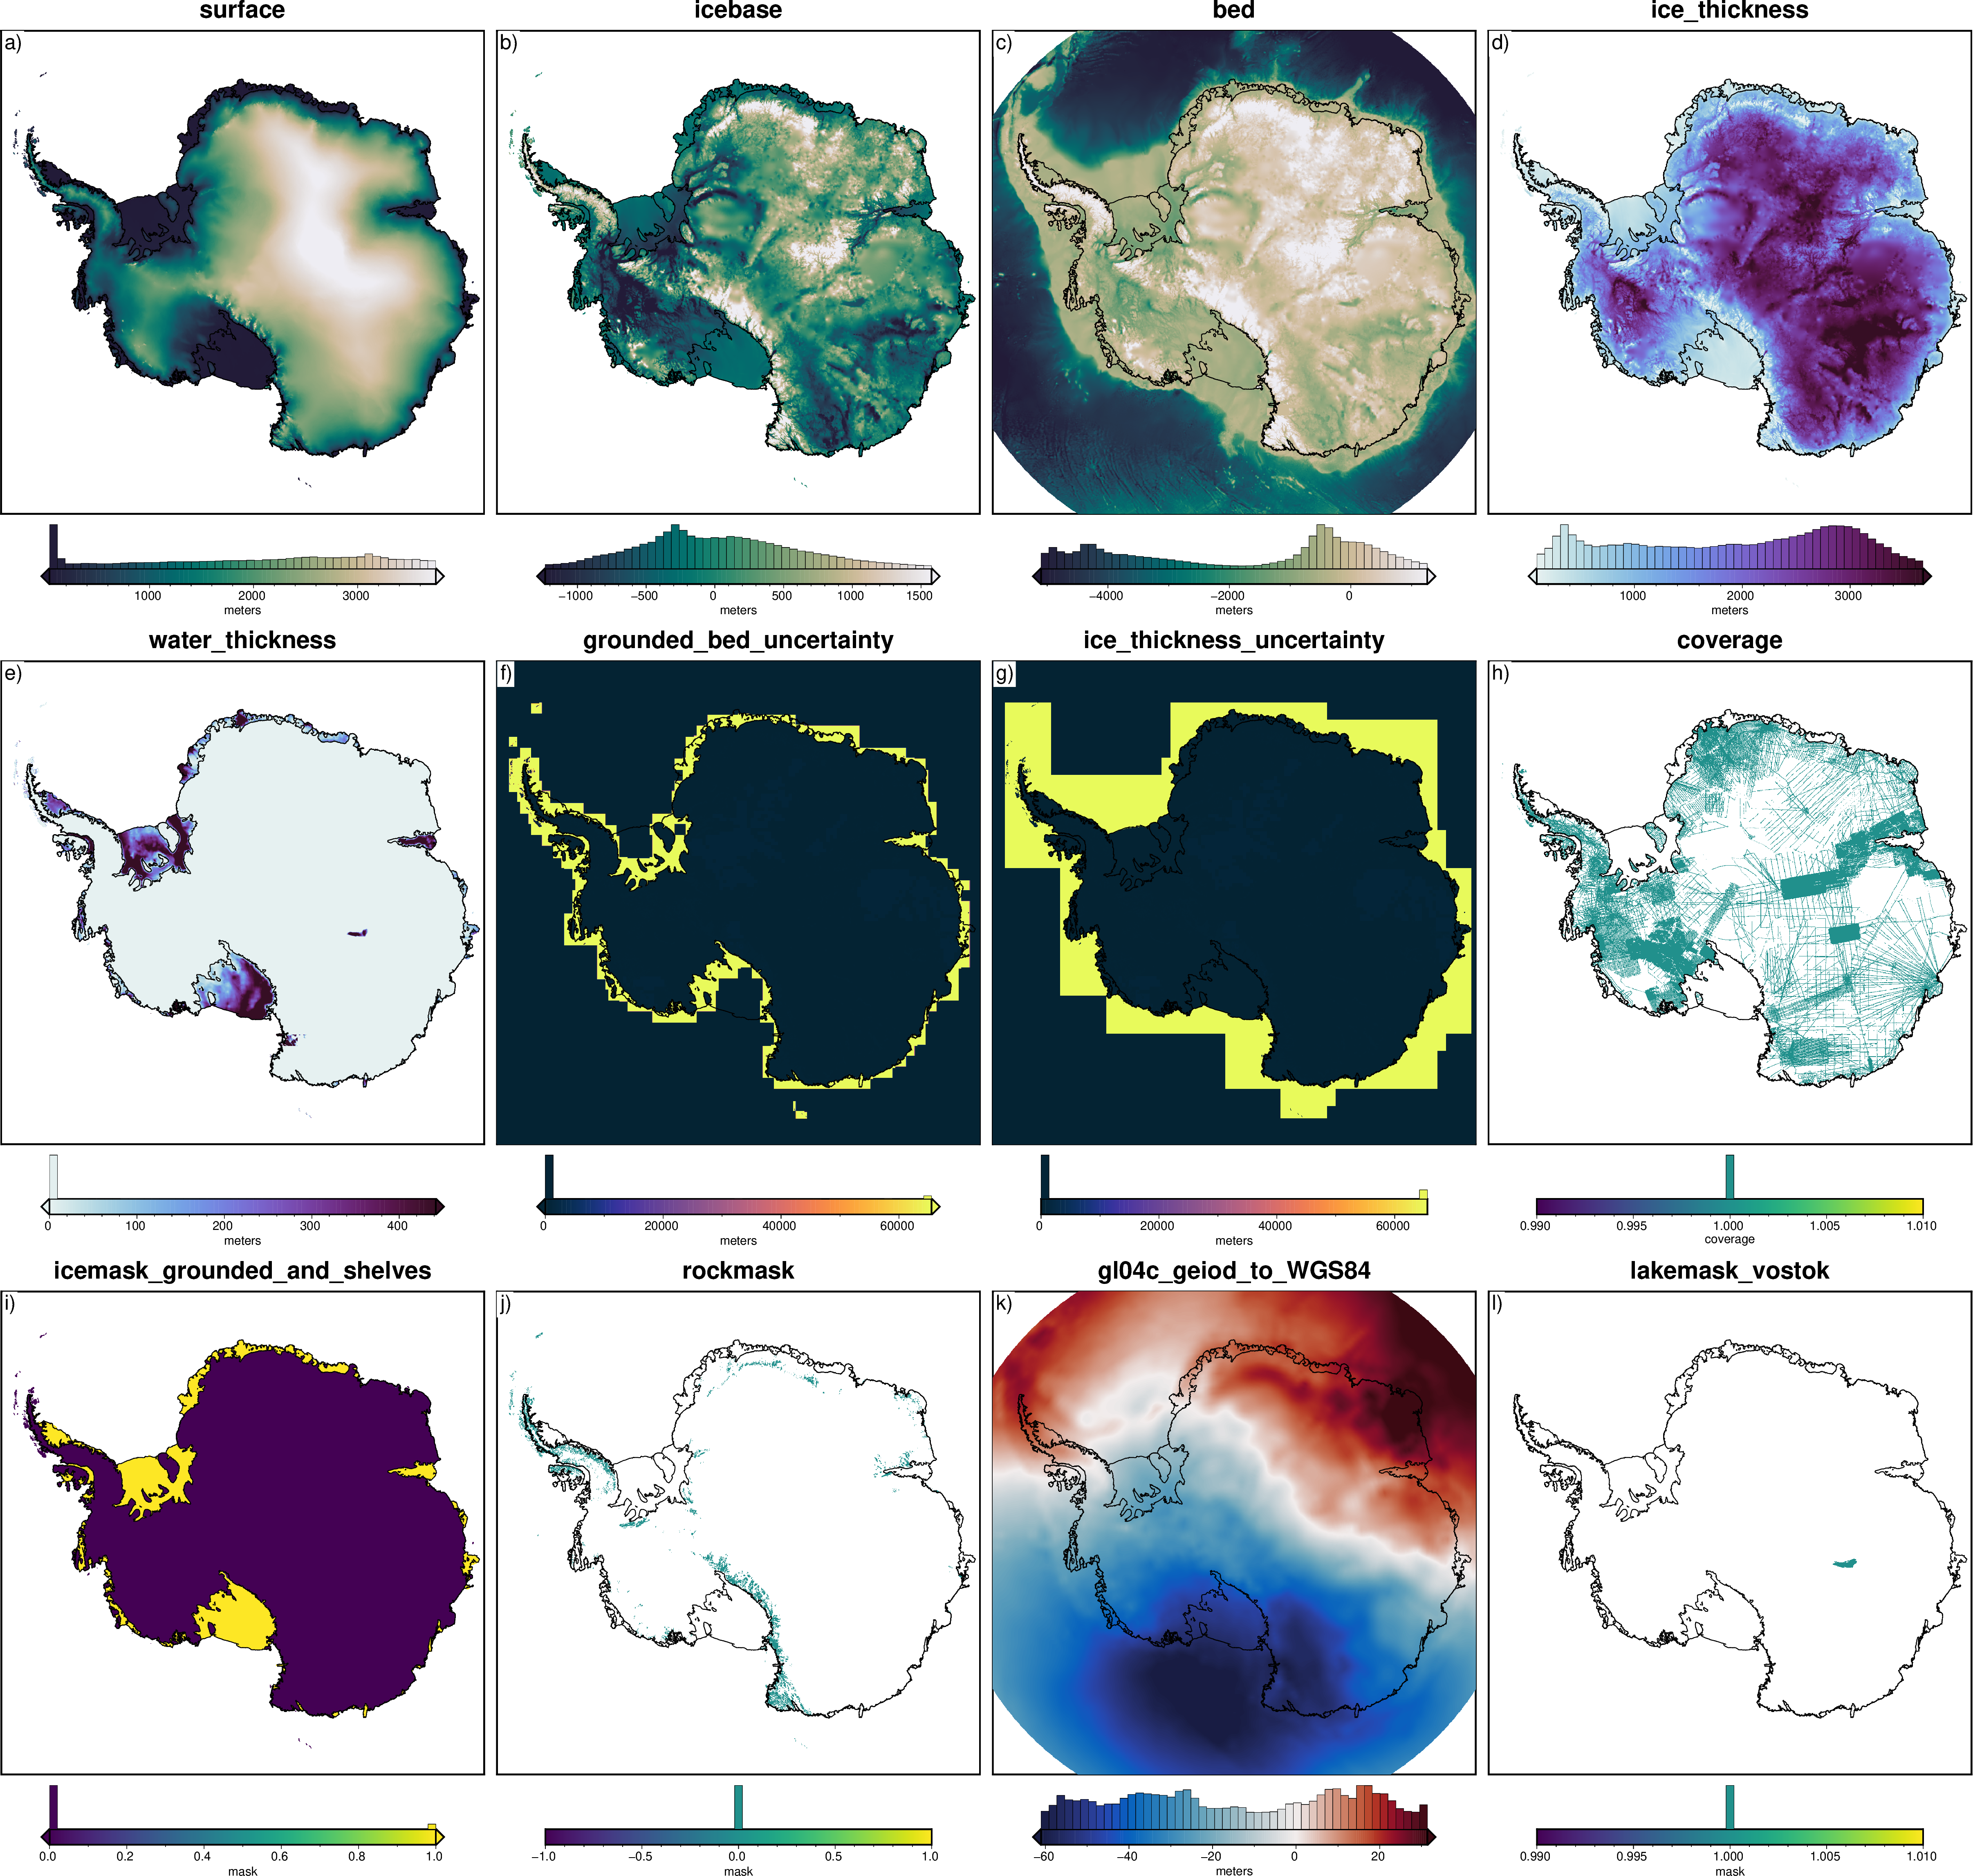

In [3]:
titles = [
    # topographies
    "surface",
    "icebase",
    "bed",
    # thicknesses
    "ice_thickness",
    "water_thickness",
    # uncertainties
    "grounded_bed_uncertainty",
    "ice_thickness_uncertainty",
    # others
    "coverage",
    "icemask_grounded_and_shelves",
    "rockmask",
    "gl04c_geiod_to_WGS84",
    "lakemask_vostok",
]
cmaps = [
    "rain",
    "rain",
    "rain",
    "dense",
    "dense",
    "thermal",
    "thermal",
    "viridis",
    "viridis",
    "viridis",
    "balance+h0",
    "viridis",
]
cbar_labels = ["meters"] * 7 + ["coverage", "mask", "mask", "meters", "mask"]

reverse_cpts = [True] * 3 + [False] * 9

fig = ptk.subplots(
    grids,
    titles=titles,
    cmaps=cmaps,
    reverse_cpts=reverse_cpts,
    cbar_labels=cbar_labels,
    region=ptk.regions.antarctica,
    hist=True,
    coast=True,
    robust=True,
    hemisphere="south",
)
fig.show(dpi=200)